In [1]:
# Ref. https://www.bilibili.com/video/BV1vu41147KS/?spm_id_from=333.788&vd_source=34931166f7efbf5da9a67692b5d5f309
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
file_name = 'samples/LIDAR_TOP/n008-2018-08-01-15-16-36-0400__LIDAR_TOP__1533151603547590.pcd.bin'

In [3]:
pc = np.frombuffer(open(file_name, 'rb').read(), dtype=np.float32)

In [4]:
# [x, y, z, intensity, ring index]
# x, y, z coordinates according to lidar-frame
pc = pc.reshape(-1, 5)

In [5]:
# remove ring index since we dont need this
pc = pc[:, :4]

In [6]:
x, y, z, intensity = pc.T

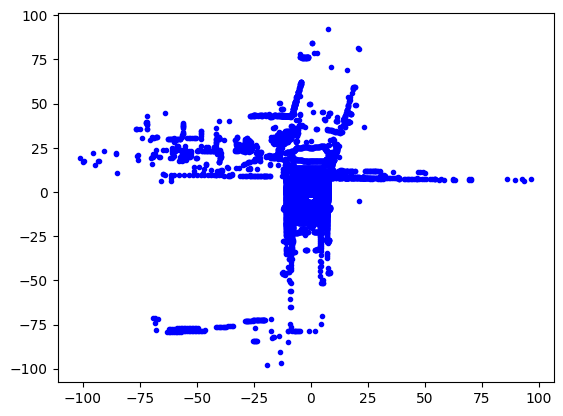

In [7]:
plt.plot(x, y, 'b.')
plt.show()

In [8]:
# normalization
pc_range = 100
x = x / pc_range # -1 to +1
y = y / pc_range

In [9]:
# config output image
img_size = 1024
img = np.zeros((img_size, img_size, 3), np.uint8)

In [10]:
# scale and move to center
x = x * img_size / 2 + img_size / 2
y = y * img_size / 2 + img_size / 2

In [11]:
for ix, iy, iz in zip(x, y, z):
    ix = int(ix)
    iy = int(iy)
    
    # keep points that are in the range
    if ix >= 0 and ix < img_size and iy >= 0 and iy < img_size:
        alpha = min(1, max(0, ((iz+5) / 2)))
        color = alpha * 255
        img[iy, ix] = color, color, color

In [1]:
cv2.imshow('pc', img)
cv2.waitKey(0)
cv2.destroyAllWindows() # dont click close, just type anything on keyborad

NameError: name 'cv2' is not defined

In [ ]:
# save img in .jpg file
cv2.imwrite('pc.jpg', img)